In [1]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
# define problem configurations used in EC.3.6.1

class NormalMeanGenerator(object):
    def __init__(self, n_alternatives, mean, var, alternatives_var):
        self.n_alternatives = n_alternatives
        self.means = np.random.normal(mean, np.sqrt(var), n_alternatives)
        self.best_mean = np.max(self.means)
        self.best = np.argmax(self.means)
        _temp = np.argpartition(self.means, -2)[-2:]
        self.gamma = np.max(self.means[_temp]) - np.min(self.means[_temp])
        self.variances = np.ones(self.n_alternatives)*alternatives_var
        self.stds = np.sqrt(self.variances)
        
    def get(self, index, n=1):
        return np.random.normal(self.means[index], self.stds[index], n)
        
    def syscount(self):
        return self.n_alternatives
    
    
class BetaMeanGenerator(object):
    def __init__(self, n_alternatives, a, b, alternatives_var):
        self.n_alternatives = n_alternatives
        self.means = data = np.random.beta(a, b, n_alternatives)
        self.best_mean = np.max(self.means)
        self.best = np.argmax(self.means)
        _temp = np.argpartition(self.means, -2)[-2:]
        self.gamma = np.max(self.means[_temp]) - np.min(self.means[_temp])
        self.variances = np.ones(self.n_alternatives)*alternatives_var
        self.stds = np.sqrt(self.variances)
        
    def get(self, index, n=1):
        return np.random.normal(self.means[index], self.stds[index], n)
        
    def syscount(self):
        return self.n_alternatives

In [5]:
num_cpus=90
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-08-04 17:03:34,341	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.15
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


In [2]:
seed = 20230804
np.random.seed(seed)
n_replications = 1000
 
min_power = 3
max_power = 16
base = 2

mean = 0
var = 1
alternatives_var = 9
delta = 0.05

rng = np.random.default_rng(seed)

In [7]:
EFG_normal_results = []

n = 100
greedy_ratio = 0.1

for power in np.arange(min_power, max_power+1):
    generators = [NormalMeanGenerator(2**power, mean, var, alternatives_var) for i in range(n_replications)]

    ng = int(greedy_ratio*n)
    n0 = n-ng
    
    print("EFG")
    PCS, PGS = parallel_experiments(rng,  generators, policy=EFG, delta=delta, remote_policy=remote_EFG, 
                                    args={"n0":n0, "ng":ng})
    EFG_normal_results.append([PCS,PGS])

EFG
--------New experiments with  k=8----------------------
Start to simulate... at Fri Aug  4 17:03:42 2023
PCS:0.803, PGS:0.823
Total time used: 1.5369181632995605s, simulation ends at Fri Aug  4 17:03:42 2023
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Fri Aug  4 17:03:44 2023
PCS:0.777, PGS:0.813
Total time used: 1.5503439903259277s, simulation ends at Fri Aug  4 17:03:44 2023
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Fri Aug  4 17:03:45 2023
PCS:0.759, PGS:0.798
Total time used: 1.543168067932129s, simulation ends at Fri Aug  4 17:03:45 2023
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Fri Aug  4 17:03:47 2023
PCS:0.764, PGS:0.812
Total time used: 1.552687406539917s, simulation ends at Fri Aug  4 17:03:47 2023
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Fri Aug  4 17:03:49 2023
PCS:0.762, PGS:0.811
Total time used: 1.

In [8]:
EFG_beta_results = []

n = 100
greedy_ratio = 0.1
a = 1.5
b = 2

for power in np.arange(min_power, max_power+1):
    generators = [BetaMeanGenerator(2**power, a, b, alternatives_var) for i in range(n_replications)]

    ng = int(greedy_ratio*n)
    n0 = n-ng
    
    print("EFG")
    PCS, PGS = parallel_experiments(rng,  generators, policy=EFG, delta=delta, remote_policy=remote_EFG, 
                                    args={"n0":n0, "ng":ng})
    EFG_beta_results.append([PCS,PGS])

EFG
--------New experiments with  k=8----------------------
Start to simulate... at Fri Aug  4 17:09:22 2023
PCS:0.418, PGS:0.517
Total time used: 1.6150321960449219s, simulation ends at Fri Aug  4 17:09:22 2023
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Fri Aug  4 17:09:24 2023
PCS:0.326, PGS:0.437
Total time used: 1.5827515125274658s, simulation ends at Fri Aug  4 17:09:24 2023
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Fri Aug  4 17:09:26 2023
PCS:0.257, PGS:0.41
Total time used: 1.6097819805145264s, simulation ends at Fri Aug  4 17:09:26 2023
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Fri Aug  4 17:09:27 2023
PCS:0.18, PGS:0.322
Total time used: 1.5928959846496582s, simulation ends at Fri Aug  4 17:09:27 2023
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Fri Aug  4 17:09:29 2023
PCS:0.115, PGS:0.322
Total time used: 1.

In [13]:
EFG_normal_results = np.array(EFG_normal_results)
EFG_beta_results = np.array(EFG_beta_results)
EFG_results_list = [EFG_normal_results.T, EFG_beta_results.T]

In [14]:
# # EFG_normal_results

# EFG_results_list = [np.array([[0.803, 0.777, 0.759, 0.764, 0.762, 0.749, 0.754, 0.728, 0.718,
#          0.736, 0.707, 0.698, 0.647, 0.678],
#         [0.823, 0.813, 0.798, 0.812, 0.811, 0.804, 0.812, 0.797, 0.797,
#          0.804, 0.775, 0.784, 0.727, 0.762]]),
#  np.array([[0.418, 0.326, 0.257, 0.18 , 0.115, 0.108, 0.094, 0.08 , 0.056,
#          0.046, 0.043, 0.023, 0.022, 0.024],
#         [0.517, 0.437, 0.41 , 0.322, 0.322, 0.309, 0.326, 0.353, 0.408,
#          0.463, 0.503, 0.57 , 0.641, 0.681]])]

In [3]:
num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-12-16 17:04:30,188	INFO worker.py:1544 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.9.13
Ray version:,2.3.0
Dashboard:,http://127.0.0.1:8265


In [7]:
seed = 20230827
np.random.seed(seed)
n_replications = 1000
 
min_power = 3
max_power = 16
base = 2

mean = 0
var = 1
alternatives_var = 9
delta = 0.05

rng = np.random.default_rng(seed)

In [ ]:
EA_normal_results = []

n = 100

for power in np.arange(min_power, max_power+1):
    generators = [NormalMeanGenerator(2**power, mean, var, alternatives_var) for i in range(n_replications)]

    ng = 0
    n0 = n-ng
    
    print("EFG")
    PCS, PGS = parallel_experiments(rng,  generators, policy=EFG, delta=delta, remote_policy=remote_EFG, 
                                    args={"n0":n0, "ng":ng})
    EA_normal_results.append([PCS,PGS])

EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sat Dec 16 17:09:38 2023
PCS:0.785, PGS:0.813
Total time used: 0.6706740856170654s, simulation ends at Sat Dec 16 17:09:38 2023
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sat Dec 16 17:09:38 2023
PCS:0.749, PGS:0.776
Total time used: 0.6332406997680664s, simulation ends at Sat Dec 16 17:09:38 2023
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sat Dec 16 17:09:39 2023
PCS:0.707, PGS:0.736
Total time used: 0.7105638980865479s, simulation ends at Sat Dec 16 17:09:39 2023
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sat Dec 16 17:09:40 2023
PCS:0.667, PGS:0.707
Total time used: 0.6406118869781494s, simulation ends at Sat Dec 16 17:09:40 2023
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sat Dec 16 17:09:40 2023
PCS:0.62, PGS:0.667
Total time used: 0

In [9]:
EA_beta_results = []

n = 100
a = 1.5
b = 2

for power in np.arange(min_power, max_power+1):
    generators = [BetaMeanGenerator(2**power, a, b, alternatives_var) for i in range(n_replications)]

    ng = 0
    n0 = n-ng
    
    print("EFG")
    PCS, PGS = parallel_experiments(rng,  generators, policy=EFG, delta=delta, remote_policy=remote_EFG, 
                                    args={"n0":n0, "ng":ng})
    EA_beta_results.append([PCS,PGS])

EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug 27 22:21:08 2023
PCS:0.392, PGS:0.472
Total time used: 0.7870349884033203s, simulation ends at Sun Aug 27 22:21:08 2023
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug 27 22:21:09 2023
PCS:0.267, PGS:0.386
Total time used: 0.8260071277618408s, simulation ends at Sun Aug 27 22:21:09 2023
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug 27 22:21:09 2023
PCS:0.191, PGS:0.284
Total time used: 0.8072988986968994s, simulation ends at Sun Aug 27 22:21:10 2023
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug 27 22:21:10 2023
PCS:0.129, PGS:0.254
Total time used: 0.7869389057159424s, simulation ends at Sun Aug 27 22:21:10 2023
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug 27 22:21:11 2023
PCS:0.075, PGS:0.214
Total time used: 

In [10]:
EA_normal_results = np.array(EA_normal_results)
EA_beta_results = np.array(EA_beta_results)
EA_results_list = [EA_normal_results.T, EA_beta_results.T]

In [12]:
EA_results_list

[array([[0.785, 0.749, 0.707, 0.667, 0.62 , 0.593, 0.564, 0.552, 0.511,
         0.526, 0.496, 0.487, 0.449, 0.47 ],
        [0.813, 0.776, 0.736, 0.707, 0.667, 0.632, 0.61 , 0.604, 0.564,
         0.567, 0.546, 0.547, 0.508, 0.511]]),
 array([[0.392, 0.267, 0.191, 0.129, 0.075, 0.065, 0.028, 0.026, 0.019,
         0.007, 0.003, 0.001, 0.003, 0.   ],
        [0.472, 0.386, 0.284, 0.254, 0.214, 0.2  , 0.182, 0.149, 0.165,
         0.144, 0.138, 0.125, 0.162, 0.163]])]

In [ ]:
# results drawn from the above experiments for producing the Figure EC12 & 13

## EA_normal_results [PCS, PGS]
## EA_beta_results [PCS, PGS]

# EA_results_list = [np.array([[0.785, 0.749, 0.707, 0.667, 0.62 , 0.593, 0.564, 0.552, 0.511,
#          0.526, 0.496, 0.487, 0.449, 0.47 ],
#         [0.813, 0.776, 0.736, 0.707, 0.667, 0.632, 0.61 , 0.604, 0.564,
#          0.567, 0.546, 0.547, 0.508, 0.511]]),
#  np.array([[0.392, 0.267, 0.191, 0.129, 0.075, 0.065, 0.028, 0.026, 0.019,
#          0.007, 0.003, 0.001, 0.003, 0.   ],
#         [0.472, 0.386, 0.284, 0.254, 0.214, 0.2  , 0.182, 0.149, 0.165,
#          0.144, 0.138, 0.125, 0.162, 0.163]])]

## EFG_normal_results [PCS, PGS]
## EFG_beta_results [PCS, PGS]

# EFG_results_list = [np.array([[0.803, 0.777, 0.759, 0.764, 0.762, 0.749, 0.754, 0.728, 0.718,
#          0.736, 0.707, 0.698, 0.647, 0.678],
#         [0.823, 0.813, 0.798, 0.812, 0.811, 0.804, 0.812, 0.797, 0.797,
#          0.804, 0.775, 0.784, 0.727, 0.762]]),
#  np.array([[0.418, 0.326, 0.257, 0.18 , 0.115, 0.108, 0.094, 0.08 , 0.056,
#          0.046, 0.043, 0.023, 0.022, 0.024],
#         [0.517, 0.437, 0.41 , 0.322, 0.322, 0.309, 0.326, 0.353, 0.408,
#          0.463, 0.503, 0.57 , 0.641, 0.681]])]

In [ ]:
# Fig Plot

In [82]:
# Figure EC 12 for normal

results_list = [[EFG_results_list[0][0],
EA_results_list[0][0]],
[EFG_results_list[0][1],
EA_results_list[0][1]]]

# results_list = [np.array([[0.803, 0.777, 0.759, 0.764, 0.762, 0.749, 0.754, 0.728, 0.718,
#          0.736, 0.707, 0.698, 0.647, 0.678],
# [0.785, 0.749, 0.707, 0.667, 0.62 , 0.593, 0.564, 0.552, 0.511,
#          0.526, 0.496, 0.487, 0.449, 0.47 ]]), 
                
# np.array([[0.823, 0.813, 0.798, 0.812, 0.811, 0.804, 0.812, 0.797, 0.797,
#          0.804, 0.775, 0.784, 0.727, 0.762],
#           [0.813, 0.776, 0.736, 0.707, 0.667, 0.632, 0.61 , 0.604, 0.564,
#          0.567, 0.546, 0.547, 0.508, 0.511]])]

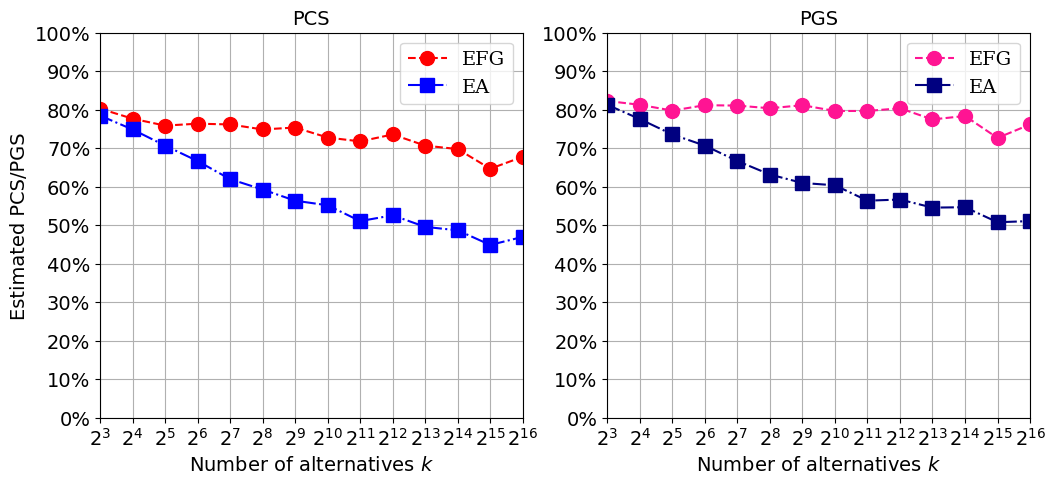

In [83]:
fontsize=14

colors = ["red", 
"blue",

          "cyan",
          "deeppink", 
"navy",
          "darkturquoise",

]
colors = [["red", "blue"], ["deeppink", "navy"]]
markers = ["o","s"]
line_styles = ["--", "-.", ":","--", "-.", ":"]

fig = plt.figure(figsize= (12, 5))


fig_plots = [(1,2,1), (1,2, 2)]

titles = ["PCS", "PGS"]
labels = ["EFG", "EA"]
powers = np.arange(min_power, max_power+1)


for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    
    results = results_list[i]

    for j, result in enumerate(results):
        plt.plot(powers, result, line_styles[j], marker=markers[j], markersize=10,  color=colors[i][j], label=labels[j])
    
    plt.xlim(min_power, max_power)
    xticks = np.arange(min_power, max_power+1)
    xticklabels = ["2^{"+str(power)+"}" for power in xticks]
    #xticklabels = [str(2 ** (power)) for power in xticks]
    xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
    plt.xticks(powers, xticklabels,fontsize=fontsize)

    min_result = np.min(results)
    max_result = np.max(results)

    min_level = (min_result // 0.1-1)*0.1
    max_level = (max_result // 0.1 + 1)*0.1

    plt.ylim(0.0, 1.0)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize)

    ax.legend(prop={'family': 'serif',"size":fontsize}, ncol=1)
    ax.set_xlabel("Number of alternatives $k$", size=fontsize)
    if i == 0:
        ax.set_ylabel("Estimated PCS/PGS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.2)

plt.show()

fig.savefig("Figure_EC12.pdf", bbox_inches='tight')

In [84]:
# Figure EC 13 for beta

results_list = [[EFG_results_list[1][0],
EA_results_list[1][0]],
[EFG_results_list[1][1],
EA_results_list[1][1]]]

# results_list = [np.array([[0.418, 0.326, 0.257, 0.18 , 0.115, 0.108, 0.094, 0.08 , 0.056,
#          0.046, 0.043, 0.023, 0.022, 0.024],
#                          [0.392, 0.267, 0.191, 0.129, 0.075, 0.065, 0.028, 0.026, 0.019,
#          0.007, 0.003, 0.001, 0.003, 0.   ]]), 
                
#                          np.array([[0.517, 0.437, 0.41 , 0.322, 0.322, 0.309, 0.326, 0.353, 0.408,
#          0.463, 0.503, 0.57 , 0.641, 0.681],
#                                  [0.472, 0.386, 0.284, 0.254, 0.214, 0.2  , 0.182, 0.149, 0.165,
#          0.144, 0.138, 0.125, 0.162, 0.163]])]

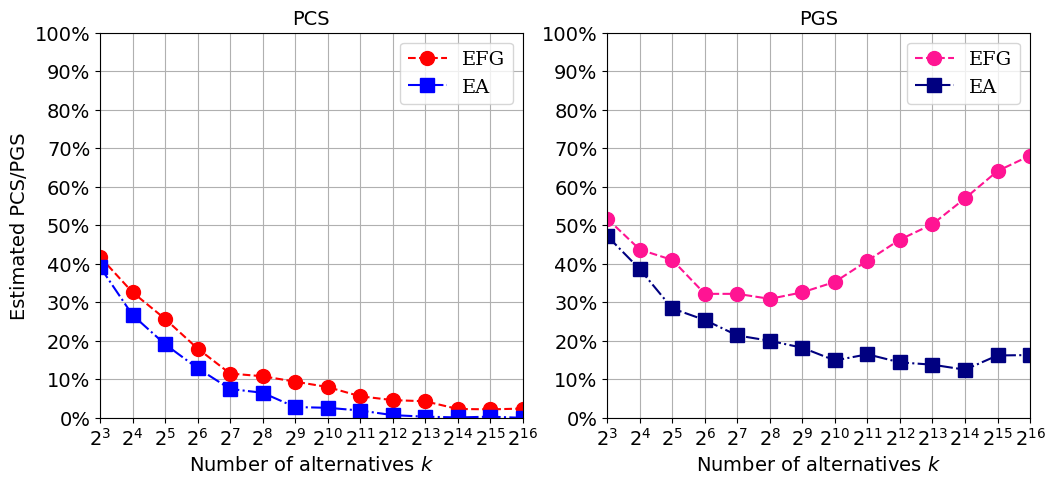

In [85]:
fontsize=14

colors = ["red", 
"blue",

          "cyan",
                    "deeppink", 
"navy",
          "darkturquoise",

]
colors = [["red", "blue"], ["deeppink", "navy"]]
markers = ["o","s"]
line_styles = ["--", "-.", ":","--", "-.", ":"]

fig = plt.figure(figsize= (12, 5))


fig_plots = [(1,2,1), (1,2, 2)]

titles = ["PCS", "PGS"]
labels = ["EFG", "EA"]
powers = np.arange(min_power, max_power+1)


for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    
    results = results_list[i]

    for j, result in enumerate(results):
        plt.plot(powers, result, line_styles[j], marker=markers[j], markersize=10,  color=colors[i][j], label=labels[j])
    
    plt.xlim(min_power, max_power)
    xticks = np.arange(min_power, max_power+1)
    xticklabels = ["2^{"+str(power)+"}" for power in xticks]
    #xticklabels = [str(2 ** (power)) for power in xticks]
    xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
    plt.xticks(powers, xticklabels,fontsize=fontsize)

    min_result = np.min(results)
    max_result = np.max(results)

    min_level = (min_result // 0.1-1)*0.1
    max_level = (max_result // 0.1 + 1)*0.1

    plt.ylim(0.0, 1.0)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize)

    ax.legend(prop={'family': 'serif',"size":fontsize}, ncol=1)
    ax.set_xlabel("Number of alternatives $k$", size=fontsize)
    if i == 0:
        ax.set_ylabel("Estimated PCS/PGS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.2)

plt.show()

fig.savefig("Figure_EC13.pdf", bbox_inches='tight')